# 溫度與捷運運輸量的相關性

資料來源:https://data.gov.tw/dataset/61797
https://www.cwb.gov.tw/

主要想探討溫度與捷運運輸量之間是否有出現相關性。

#讀取2017年每月份的捷運運輸量
 Month 為月份
 Average transport amout 為每月份總運輸量的平均值
 temperature為2017年月均溫

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# This is a custom matplotlib style that I use for most of my charts
#plt.style.use('https://gist.githubusercontent.com/rhiever/d0a7332fe0beebfdc3d5/raw/205e477cf231330fe2f265070f7c37982fd3130c/tableau10.mplstyle')

MRT_AVG = pd.read_csv('2017MRT_month.csv')
MRT_AVG.head()


,Month,Average Transport Amount (people),temperature
0,1,1936615,18.3
1,2,2046706,17.0
2,3,2122548,18.2
3,4,2034486,22.5
4,5,2010690,25.6


''

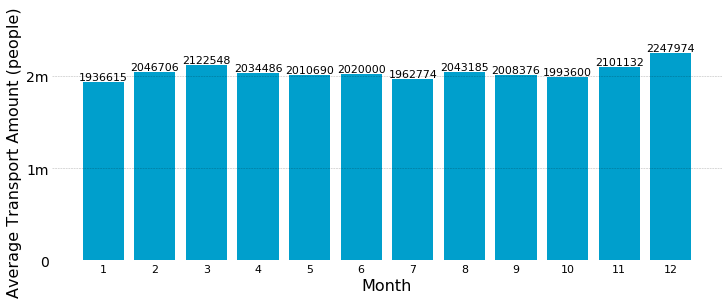

In [48]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(111)

for (i, row) in MRT_AVG.iterrows():
    plt.bar([i - 0.2, i + 0.2], [row['Average Transport Amount (people)']],
            color=['#009FCC'], width=0.4, align='center', edgecolor='none')
    
#plt.xlim(-0.6, 20.6)
plt.xticks(range(0, 12), MRT_AVG['Month'], fontsize=11)
plt.grid(False, axis='x')
plt.yticks(np.arange(0, 3e6, 1e6),
           ['{}m'.format(int(x / 1e6)) if x > 0 else 0 for x in np.arange(0, 3e6, 1e6)])

for x,y in enumerate(MRT_AVG['Average Transport Amount (people)']):

    plt.text(x, y+0.05, '%.0f' % y, ha='center', va= 'bottom',fontsize=11)

plt.xlabel('Month')
plt.ylabel('Average Transport Amount (people)')

plt.savefig('pop_pyramid_grouped.pdf')
;

上方圖示為每月份總運輸量的直條圖
每個柱狀上方為總運輸人數的平均值


In [57]:
y = MRT_AVG['Average Transport Amount (people)']
y

0     1936615
1     2046706
2     2122548
3     2034486
4     2010690
5     2020000
6     1962774
7     2043185
8     2008376
9     1993600
10    2101132
11    2247974
Name: Average Transport Amount (people), dtype: int64

上方為列出2017MRT_month.csv總運輸量的平均值

In [58]:
x = MRT_AVG['temperature']
x

0     18.3
1     17.0
2     18.2
3     22.5
4     25.6
5     28.0
6     30.3
7     31.1
8     29.6
9     25.6
10    22.5
11    17.8
Name: temperature, dtype: float64

上方為列出2017MRT_month.csv的月均溫

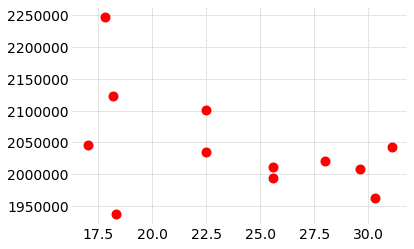

In [60]:
plt.plot(x,y, 'ro')

上方為分布圖
X軸為溫度
Y軸為人次
點點為月均溫上人次的分布

In [62]:
stats.pearsonr(x,y)

(-0.45266595627292816, 0.13949849326368682)

結論:
從圖可以看到溫度與總人數關聯性極低
因此無法說明溫度為是否搭乘捷運主要原因。